# Prosjekt 1: Datahåndtering og statistikk
_Maruis Børs Lind, Jonas Mayer & Jakob Ruth_  
 

### Mål
Målet med prosjektet er å finne:  
* Sammenheng mellom $V(t)$ og $S'(t)$  
* Korrelasjon mellom Puls og høydeendring  
* Beskrive pulsen med forskjellig deskriptiv statistikk.

### Hypotese:
* Farten og strekningsforskjellen over en kort tid vil være det samme, $V(t)=S'(t)$, siden det er trangt om plass i en klokke så tror jeg de bruker samme sensor for dette. 
* Det kommer til å være god korrelasjon mellom puls og høydeendring. 
* Pulsen kommer til å øke mye i starten av treningsøkten, og deretter stabilisere seg ganske bra etter en liten stund, men med noen svinginger opp og ned.

### Teori:

Under prosjoektet har jeg brukt p-tester, t-tester, korrelasjonsanalyse og hypoteseanalyse for å se om en hypotese stemmer. Jeg har brukt regresjon, for å finne en tilpasset linje, samt $R^2$ verdi for å se om tilpassningen var en god tilpassning. Jeg har brukt lineær interpolasjon, en måte å finne en verdi mellom to eksisterende verdier, og derivasjon. Jeg bruker også gjennomsnitt, standaravvik, median, Q1, Q2, Q3 og interkvartilbredde.

##### Definisjoner:
S = Strenkning (m)\
T = Tid (s) \
V = Hastighet (m/s) \
Hr = Puls (Bpm) \
h = Høyde (moh)\
Høydeendring = $\dot{h}$ = h'(t)

#### Bruk av AI:
Jeg har skrevet eksplisitt der jeg har kopiert hele koden til AI, ChatGPT, eller endret koden. Jeg har også brukt ChatGPT til diverse feilsøking, men har da ikke kopiert hele koden den kommer med, men heller endret det den anbefaler. Noen steder så har jeg kopiert enkelt linjer med kode som den har kommet med, men jeg har da passet på å forstå det den endrer. I tillegg har jeg spurt den om noe bruk og definisjoner av statistiske metoder, som p-test og t-test. Da har jeg ikke kopiert svaret, men brukt det som hjelp til forståelse og googlet rund for å se om det ser ut til å stemme. Jeg har også brukt ChatGPT til hjelp med bruk av biblioteker, for eksempel å endre farge i et plot, eller hvordan sentrere plottet riktig. 
\
\
Én ChatGPT logg: https://chatgpt.com/share/673c842f-d22c-8013-8af5-3b3135c94c9f

Hovedloggen inneholder bilder, så da kunne jeg ikke dele den (?), men bare kontakt Jakob

### Beskrivelse av data:
Dataene er hentet fra en Garmin forerunner 945 under en rulleskitreningsøkt. Pulsen er samlet inn av et Garmin pulsbelte. Det ble lastet ned som en TCX fil og omgjort til en parquet fil ved hjelp av følgende program: 


In [4]:
'''
import numpy as np
import pylab as plt
import pandas as pd



f = open(r'C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.tcx','rt')
lines = f.readlines()
f.close()

old_time = -1
i=0
data = []
while i<len(lines):
    line = lines[i]
    if line.strip().startswith('<Time>'):
        time = np.datetime64(line.split('<Time>')[1].split('</Time>')[0])
        print(time)
    if line.strip().startswith('<AltitudeMeters>'):
        alt = np.float64(line.split('<AltitudeMeters>')[1].split('</AltitudeMeters>')[0])
        print(alt)
    if line.strip().startswith('<LatitudeDegrees>'):
        lat = np.float64(line.split('<LatitudeDegrees>')[1].split('</LatitudeDegrees>')[0])
        print(lat)
    if line.strip().startswith('<LongitudeDegrees>'):
        long = np.float64(line.split('<LongitudeDegrees>')[1].split('</LongitudeDegrees>')[0])
        print(long)
    if line.strip().startswith('<HeartRateBpm>'):
        i+=1
        line = lines[i]
        hr = np.float64(line.split('<Value>')[1].split('</Value>')[0])
        print(hr)
    if line.strip().startswith('<ns3:Speed>'):
        speed = np.float64(line.split('<ns3:Speed>')[1].split('</ns3:Speed>')[0])
        print(speed)
    if line.strip().startswith('<DistanceMeters>'):
        dist = np.float64(line.split('<DistanceMeters>')[1].split('</DistanceMeters>')[0])
        print(dist)
    if line.strip().startswith('</Trackpoint>'):
        data.append([time, alt, lat, long, dist, speed, hr])
    i+=1

df = pd.DataFrame(data, columns=['Time','Alt' ,'Lat', 'Long', 'Dist','Speed','Hr'])
df.to_parquet(r'C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.parquet')

fig, axs = plt.subplots(3,3,figsize=[8,8])
axs = np.ravel(axs)

ax = axs[0]
ax.plot(df.Time)

for i in [1,2,3,4,5,6]:
    ax = axs[i]
    ax.plot(df.Time, df.iloc[:,i])
    ax.set_title(df.columns[i])
fig.tight_layout()

plt.show()
'''

"\nimport numpy as np\nimport pylab as plt\nimport pandas as pd\n\n\n\nf = open(r'C:\\Skole\\Programing\\Prosjekt høst\\Del 2\x07ctivity_17462054947.tcx','rt')\nlines = f.readlines()\nf.close()\n\nold_time = -1\ni=0\ndata = []\nwhile i<len(lines):\n    line = lines[i]\n    if line.strip().startswith('<Time>'):\n        time = np.datetime64(line.split('<Time>')[1].split('</Time>')[0])\n        print(time)\n    if line.strip().startswith('<AltitudeMeters>'):\n        alt = np.float64(line.split('<AltitudeMeters>')[1].split('</AltitudeMeters>')[0])\n        print(alt)\n    if line.strip().startswith('<LatitudeDegrees>'):\n        lat = np.float64(line.split('<LatitudeDegrees>')[1].split('</LatitudeDegrees>')[0])\n        print(lat)\n    if line.strip().startswith('<LongitudeDegrees>'):\n        long = np.float64(line.split('<LongitudeDegrees>')[1].split('</LongitudeDegrees>')[0])\n        print(long)\n    if line.strip().startswith('<HeartRateBpm>'):\n        i+=1\n        line = lines[i]

Programmet ble ikke laget av meg, men jeg hjalp til med å lage det, og forstår hvordan det fungerer. Programmet går gjennom hver linje i TCX-filen og sjekker om den starter med 'Time', 'AltitudeMeters', 'LatitudeDegrees', 'LongitudeDegrees', 'ns3:Speed' eller 'DistanceMeters' i <> og legger verdien til i hver sin variabel. Deretter legger den til alle varieblene i en liste. Den lager en pandas dataframe og lagrer dataframen som en parquet fil. En parquet fil er en type fil som lagrer dataene i kolonner og ikke i rader, og fordi disse dataene pleier å være ganske like og da er kompresjonen mer effektiv og filen blir mye mindre. Da går det mye raskere å lese den senere. Her er ikke dette strengt tatt nødevendig, men ved større datasett, så kan dette være en stor fordel. 

#### Oppstart

Importerer de nødvendige bibliotekene

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

Leser inn dataene med pandas

In [6]:
df_raw=pd.read_parquet(r"C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.parquet")

Fjerner data som har samme tid, dersom noe har blitt logget to ganger og legger til en kolonne som er tid siden start

In [7]:
df = df_raw.rename(columns={'Time':'Timestamp'}).drop_duplicates()
df['Time'] = (df.Timestamp-df.Timestamp.min()).dt.total_seconds()

Sjekker de fem første og siste radene og ser etter om alt ser riktig ut, sjekker også infoen til datasettet for å se om alt har riktig formatering.

In [8]:
df.head()

,Timestamp,Alt,Lat,Long,Dist,Speed,Hr,Time
0,2024-11-05 07:56:45,53.200001,59.911312,10.502348,0.00,3.182,110.0,0.0
1,2024-11-05 07:56:46,53.200001,59.911334,10.502327,2.77,3.173,110.0,1.0
2,2024-11-05 07:56:49,53.200001,59.911412,10.502343,11.67,3.061,112.0,4.0
3,2024-11-05 07:56:52,53.599998,59.911486,10.502416,20.85,2.846,115.0,7.0
4,2024-11-05 07:56:55,54.000000,59.911574,10.502415,30.84,2.846,117.0,10.0


In [9]:
df.tail() 

,Timestamp,Alt,Lat,Long,Dist,Speed,Hr,Time
657,2024-11-05 08:32:25,54.799999,59.910723,10.503385,8916.500000,2.389,158.0,2140.0
658,2024-11-05 08:32:32,54.400002,59.910614,10.503617,8934.349609,2.585,156.0,2147.0
659,2024-11-05 08:32:38,54.400002,59.910563,10.503771,8944.919922,2.445,155.0,2153.0
660,2024-11-05 08:32:43,54.200001,59.910564,10.503788,8945.929688,0.159,152.0,2158.0
661,2024-11-05 08:32:44,54.200001,59.910564,10.503790,8945.990234,0.000,152.0,2159.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  660 non-null    datetime64[ns]
 1   Alt        660 non-null    float64       
 2   Lat        660 non-null    float64       
 3   Long       660 non-null    float64       
 4   Dist       660 non-null    float64       
 5   Speed      660 non-null    float64       
 6   Hr         660 non-null    float64       
 7   Time       660 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 46.4 KB


Plotter for å se om klokken har samlet inn data gjevnt over tid

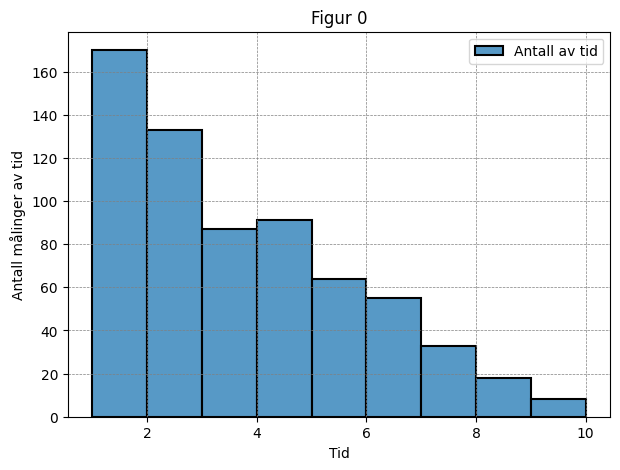

Gjennomsnittlig tid mellom målinger:  3.276176024279211


In [11]:
plt.figure(figsize=(7,5))
sns.histplot((df.Time.shift(-1)-df.Time),edgecolor='black', label="Antall av tid", linewidth=1.5, binwidth=1)
plt.xlabel("Tid")
plt.ylabel("Antall målinger av tid")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=1)
plt.title("Figur 0")
plt.legend()
plt.show()
print("Gjennomsnittlig tid mellom målinger: ", np.mean((df.Time.shift(-1)-df.Time)))

Vi ser at det er gjennomsnittlig 3.3 sekunder mellom hver måling. Vi "resampler" sånn at det blir enklere å bruke standarstatistiske metoder. Vi bruker lineær interpolasjon i tid mellom observasjonene. Jeg fikk hjelp med programmet.

In [12]:
data1 = {}
t1 = np.arange(df.Time.max())
print(t1)
for col in df.columns:
    if df.loc[:,col].dtype=='float64':
        data1[col] = np.interp(t1, df.Time, df.loc[:,col])
df1 = pd.DataFrame(data1)
#df1.info()
#df1.head()
#df1.tail()

[0.000e+00 1.000e+00 2.000e+00 ... 2.156e+03 2.157e+03 2.158e+03]


In [13]:
df = df1

### Resultater:

#### Sammenheng mellom $S'(t)$ og $V(t)$

Vi kan starte med å se på om det er en sammenheng mellom avstandsforskjellen fra punkt til punkt delt på tid, og hastighet målt av klokken  $S'(t)\approx\frac{S_1-S_0}{T_1-T_0}$ numerisk tilnærming. Med andre ord avstand derivert med hensyn til tid $S'(t)$ og $v(t)$ 

In [14]:
df["Speed_from_dist"] = (df.Dist-df.Dist.shift(-1))/(df.Time-df.Time.shift(-1))

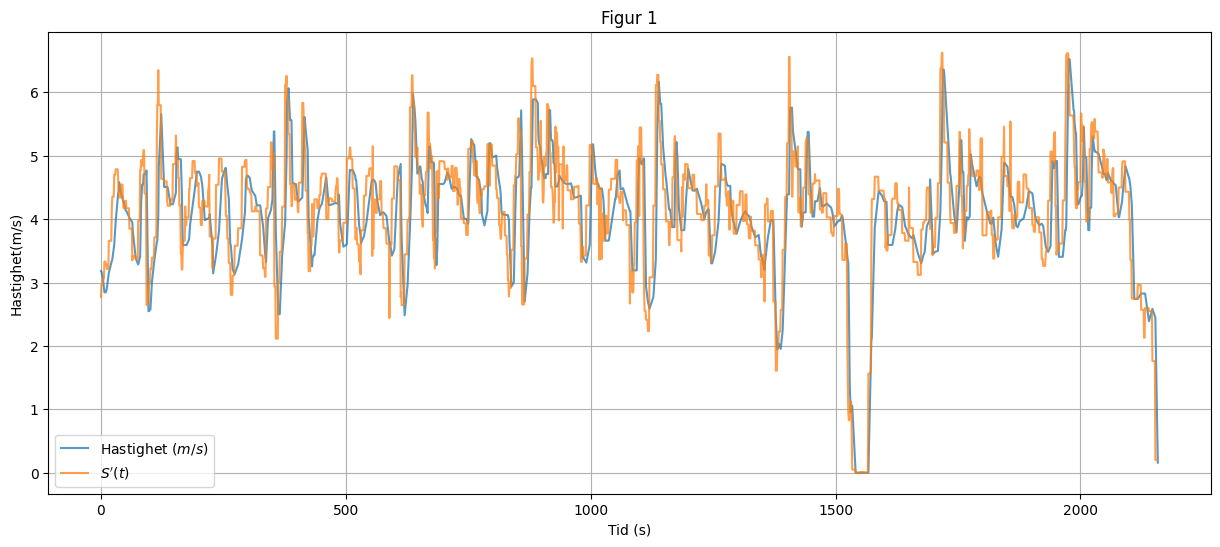

In [15]:
plt.figure(figsize=(15,6))
sns.palette="muted"
sns.lineplot(data=df, x="Time", y="Speed", alpha=0.75, label="Hastighet ($m/s$)")
sns.lineplot(data=df, x="Time", y="Speed_from_dist", alpha=0.75, label="$S'(t)$")
plt.title("Figur 1")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet(m/s)")
plt.legend()
plt.grid()
plt.show()

Ut i fra Figur 1 kan vi se at det er en sammenheng mellom Hastigheten og $S'(t)$, men at de ikke er helt like. Dersom jeg plotter punkter gitt ved x= V(t) og y= $S'(t)$ så får vi følgene plott: 

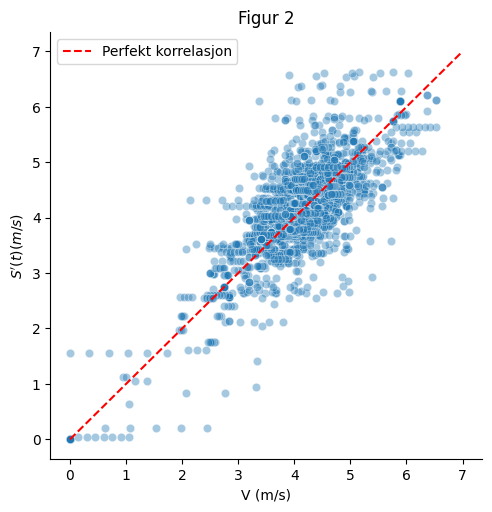

In [16]:
sns.relplot(data=df, x="Speed", y="Speed_from_dist", alpha=0.4)
plt.plot([0,7],[0,7],"r",linestyle="--", label= "Perfekt korrelasjon")
plt.title("Figur 2")
plt.xlabel("V (m/s)")
plt.ylabel("$S'(t) (m/s) $")
plt.legend()
plt.show()

Av figur 2 kan vi se at det er en ganske god sammenheng mellom farten og $S'(t)$. Dette gir mening siden $S'(t)$ bare er et annet utrykk for fart. Ved perfekt korelasjon, altså at $S'(t)$=V(t), så vil r=1 og alle punktene vil ligge på den røde linjen. Da hadde y=x, eller $S'(t)=V(t)$. For å finne korrelasjonskoeffisienten kan vi gjøre en korrelasjonsanalyse, da får vi en korrelasjon på: 

In [17]:
korrelasjon_Speed_Speed_from_dist=df["Speed"].corr(df["Speed_from_dist"])
print("r = ", korrelasjon_Speed_Speed_from_dist)

r =  0.8108678999566413


Det er ikke like bra som forventet, men dersom vi ser tilbake på Figur 1, så ser vi at dataen muligens er forskjøvet. Om vi zoomer mer inn på plottet, så kan vi se at dette stemmer

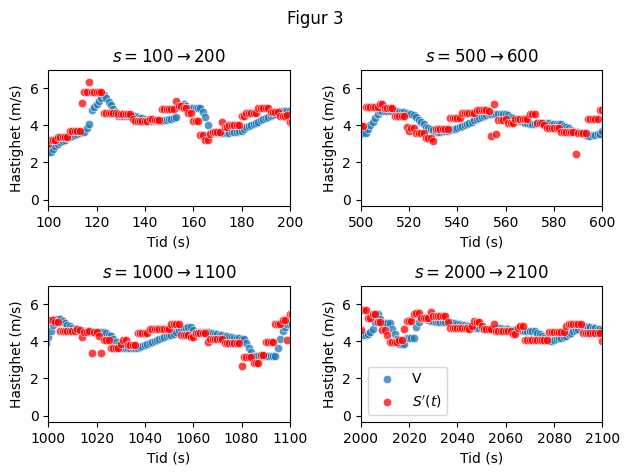

In [18]:
plt.suptitle("Figur 3")

plt.subplot(2,2,1)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 100 \rightarrow 200$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([100,200])

plt.subplot(2,2,2)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 500 \rightarrow 600$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([500,600])

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 1000 \rightarrow 1100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([1000,1100])

plt.subplot(2,2,4)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75, label="V")
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75, label = "$S'(t)$")
plt.title(r"$ s= 2000 \rightarrow 2100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([2000,2100])

plt.legend()
plt.gcf().tight_layout()
plt.show()

Det kan se ut som at alle fartspunktene (V, de blå) er forskjøvet med noen sekunder. Vi kan teste dette ved: 

In [19]:
r_list=[]
for i in range(10):
    r_list.append(df.Speed_from_dist.shift(i).corr(df["Speed"]))
    print("r",i,"= ", df.Speed_from_dist.shift(i).corr(df["Speed"]))
print("Maks verdi", max(r_list))

r 0 =  0.8108678999566413
r 1 =  0.8688822309410176
r 2 =  0.9116096876281192
r 3 =  0.938942192054467
r 4 =  0.9502820617675968
r 5 =  0.9450250310139814
r 6 =  0.9241342052321627
r 7 =  0.892440586972588
r 8 =  0.8521150992042495
r 9 =  0.8063155676138277
Maks verdi 0.9502820617675968


Det er størst korrelasjon når i er 4, altså etter 4 sekunder. Vi plotter med en forskyvning på fire:

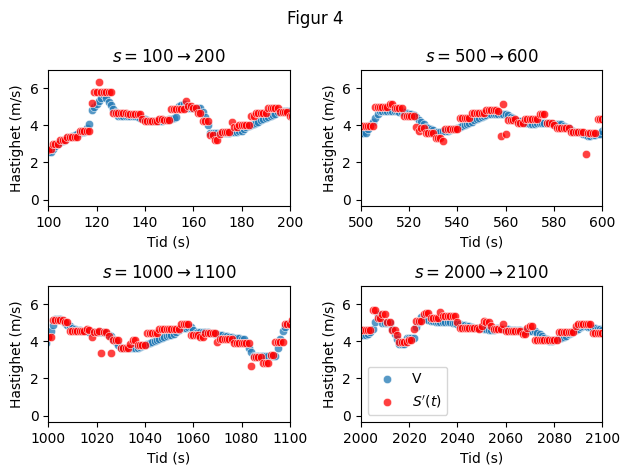

In [20]:
tid_2=df["Time"]+4
plt.suptitle("Figur 4")

plt.subplot(2,2,1)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 100 \rightarrow 200$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([100,200])

plt.subplot(2,2,2)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 500 \rightarrow 600$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([500,600])

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 1000 \rightarrow 1100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([1000,1100])

plt.subplot(2,2,4)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75, label="V")
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75, label = "$S'(t)$")
plt.title(r"$ s= 2000 \rightarrow 2100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.xlim([2000,2100])

plt.legend()
plt.gcf().tight_layout()
plt.show()

Vi ser da at det passer ekstremt mye bedre om vi forskyver $S'(t)$ med fire sekunder. Dette kan tyde på at det er et filter for hastigheten, noe som også kan forsinke målingene, men ikke strekningen. I har $S'(t)$ flere topper enn for V som vist i Figur 1. Toppene er også mer ekstreme. Her kan klokken kan da ha bommet på én strekningsverdi, og da får vi en høyere fart. Det gir mening at det blir luket ut i presentasjonen av farten fordi dette gjør at grafen blir litt mer oversiktlig. Hvis vi kjører en korrelasjonsanalyse av $S(t+4)$ og V(t) så får vi: 

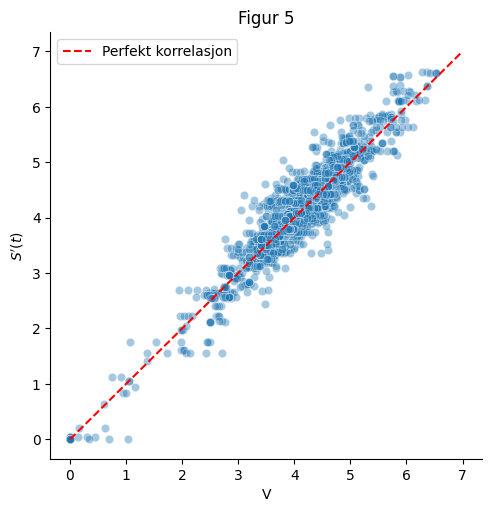

In [21]:
sns.relplot(data=df, x="Speed", y=df.Speed_from_dist.shift(4), alpha=0.4)
plt.plot([0,7],[0,7],"r",linestyle="--", label= "Perfekt korrelasjon")
plt.title("Figur 5")
plt.xlabel("V")
plt.ylabel("$S'(t)$")
plt.legend()
plt.show()

Siden punktene ligger ca gjevnt fordelt på høyre og venstre siden av linjen for perfekt korrelasjon så burde gjennomsnitts verdiene være like. Dette kan vi skjekke ved å utføre hypotesetesting. Koden her er skrevet av AI og modifisert av meg, som en del av en oppgave i timene. Uavhengi utvalg?

In [23]:
t_stat, p_value = stats.ttest_ind(df["Speed"].dropna(), df.Speed_from_dist.shift(4).dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Vi forkaster nullhypotesen - gjennomsnittene er signifikant forskjellige.")
else:
    print("Vi kan ikke forkaste nullhypotesen - det er ingen signifikant forskjell mellom gjennomsnittene.")

T-statistic: -2.2620985659316006
P-value: 0.023740885008551454
Vi forkaster nullhypotesen - gjennomsnittene er signifikant forskjellige.


Det er altså en 2,3% sjanse for at hypotesen om at dataene har samme gjennomsnitt stemmer. Vi kan derfor annta at gjennomsnittet ikke er like. Vi kan se på forskjellen i gjennomsnittsverdiene til $S'(t)$ og $V(t)$ og forskjellen i Q1, Q2, Q3 og maks verdien ved å bruke describe()

In [24]:
df["Speed"].describe()-df["Speed_from_dist"].shift(4).describe()


count    4.000000
mean    -0.063789
std     -0.052908
min      0.000000
25%     -0.035404
50%     -0.094802
75%     -0.078922
max     -0.103000
dtype: float64

Da ser vi at det er relativt liten forskjell mellom hver av dem. Forskjellen i standaravviket forteller ikke så mye om dataene, bare om ulikheten mellom målingene. Vi ser også at den eneste som er en markant høyere enn alle de andre er maks verdien, dette styrker igjen mistanken om et filter som filtrerer ut verdier som er litt raskere enn alle de andre. Filteret har nok da filtrert ut deler av en topp

#### Sammenheng mellom puls og høydeendring

For å finne en sammenheng mellom puls og høydeendring så kan vi derivere høyden med hensyn på tiden for å finne høydeendringen. Da finner vi høydeforskjellen mellom hvert målingspunkt $\dot{h}=\frac{h_1-h_0}{T_1-T_0}$

In [25]:
df["Height_diff"] = (df.Alt-df.Alt.shift(-1))/(df.Time-df.Time.shift(-1))

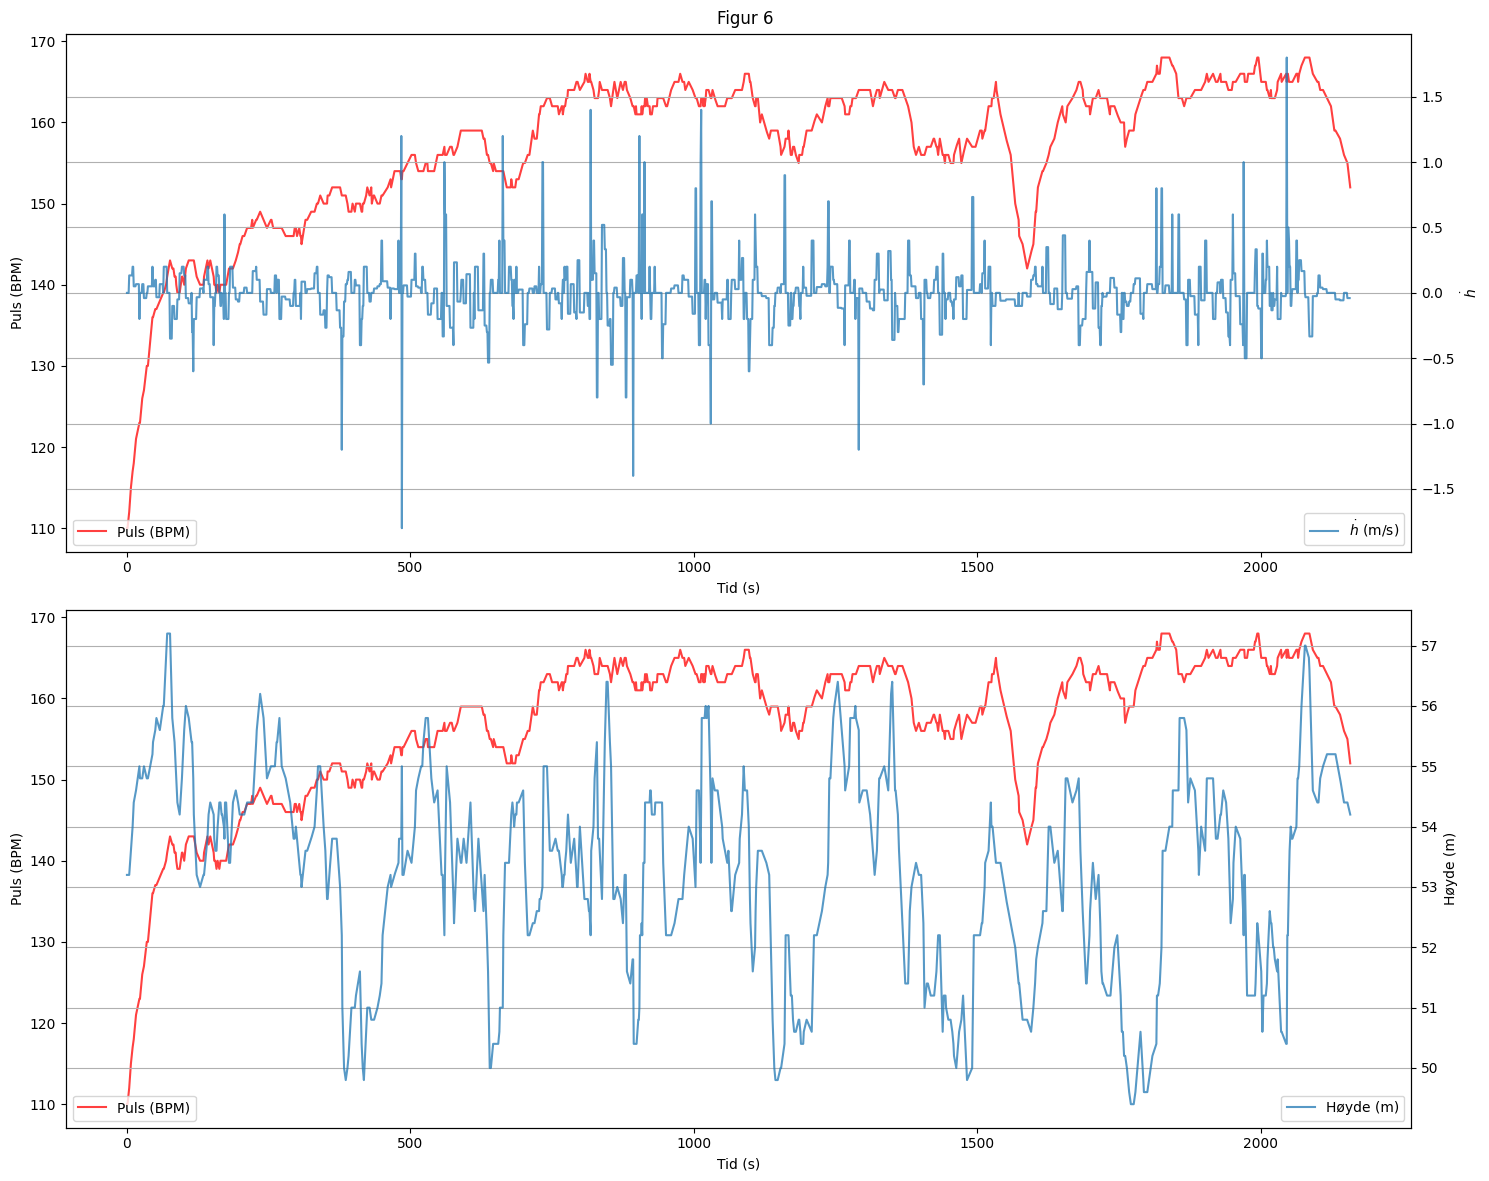

In [26]:
fig, (ax1, ax3) = plt.subplots(2,1,figsize=(15, 12))
plt.suptitle("Figur 6")
sns.lineplot(data=df, x="Time", y="Hr", alpha=0.75, label="Puls (BPM)",color="red", ax=ax1)

ax2 = ax1.twinx()

sns.lineplot(data=df, x="Time", y="Height_diff", alpha=0.75, label="$\dot{h}$ (m/s)",ax=ax2)
plt.grid()
ax1.set_xlabel("Tid (s)")
ax1.set_ylabel("Puls (BPM)")
ax2.set_ylabel("$\dot{h}$")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")


sns.lineplot(data=df, x="Time", y="Hr", alpha=0.75, label="Puls (BPM)",color="red", ax=ax3)
ax4 = ax3.twinx()

sns.lineplot(data=df, x="Time", y="Alt", alpha=0.75, label="Høyde (m)",ax=ax4)

ax3.set_xlabel("Tid (s)")
ax3.set_ylabel("Puls (BPM)")
ax4.set_ylabel("Høyde (m)")
ax3.legend(loc="lower left")
ax4.legend(loc="lower right")
plt.tight_layout()
plt.grid()
plt.show()

Figur 6 viser puls og høydeendring i samme plot. Det er verdt å notere at det virker som at pulsen kun kan måles i hele tall, fordi du kan tydelig se oppløsningen på grafen. Her forventet jeg å se at pulsen følger høydeendringen, kanskje litt forskjøvet, men det ser ikke helt sånn ut. Det nederste under i figuren viser høyden og pulsen, det er bare for å gjøre det lettere å visualisere høyden og pulsen opp mot hverandre. For å skjekke om det er en korrelasjon mellom puls og $\dot{h}$ så kan vi se på korrelasjonkoeffisienten

In [27]:
korrelasjon_Hr_h_dot=df["Hr"].corr(df["Height_diff"])
print("r=", korrelasjon_Hr_h_dot)

r= -0.014898616784041968


Det er altså en ekstremt dårlig korrelasjon mellom puls og $\dot{h}$, men hva med om vi forskyver pulsen?

In [37]:
korrelasjon_Hr_h_dot_shift=[]
for i in range(0,20):
    korrelasjon_Hr_h_dot_shift.append(df["Hr"].shift(i).corr(df["Height_diff"]))
korrelasjon_Hr_h_dot_shift=np.array(korrelasjon_Hr_h_dot_shift)
print(korrelasjon_Hr_h_dot_shift.argmax(),max(korrelasjon_Hr_h_dot_shift))
print(korrelasjon_Hr_h_dot_shift.argmin(), min(korrelasjon_Hr_h_dot_shift))

18 -0.009951687426181117
4 -0.024692038183649893


Da får vi at den beste korrelasjonskoeffisienten er $r\approx -0.02$ ved $i=0+4=4$. Dette betyr at det er høyest korrelasjonskoeffisient dersom pulsen er forøvet med 4 sekunder det også en negativ korrelasjon. Altså synker pulsen 4 sekunder etter økning i høydeendring. Dette gir lite mening, og korrelasjonskoeffisienten er veldig lav. Dette tyder på at det ikke er en korrelasjon mellom puls og høydeendring.

#### Analyse av puls

Figur 8 viser pulsen gitt ved tid

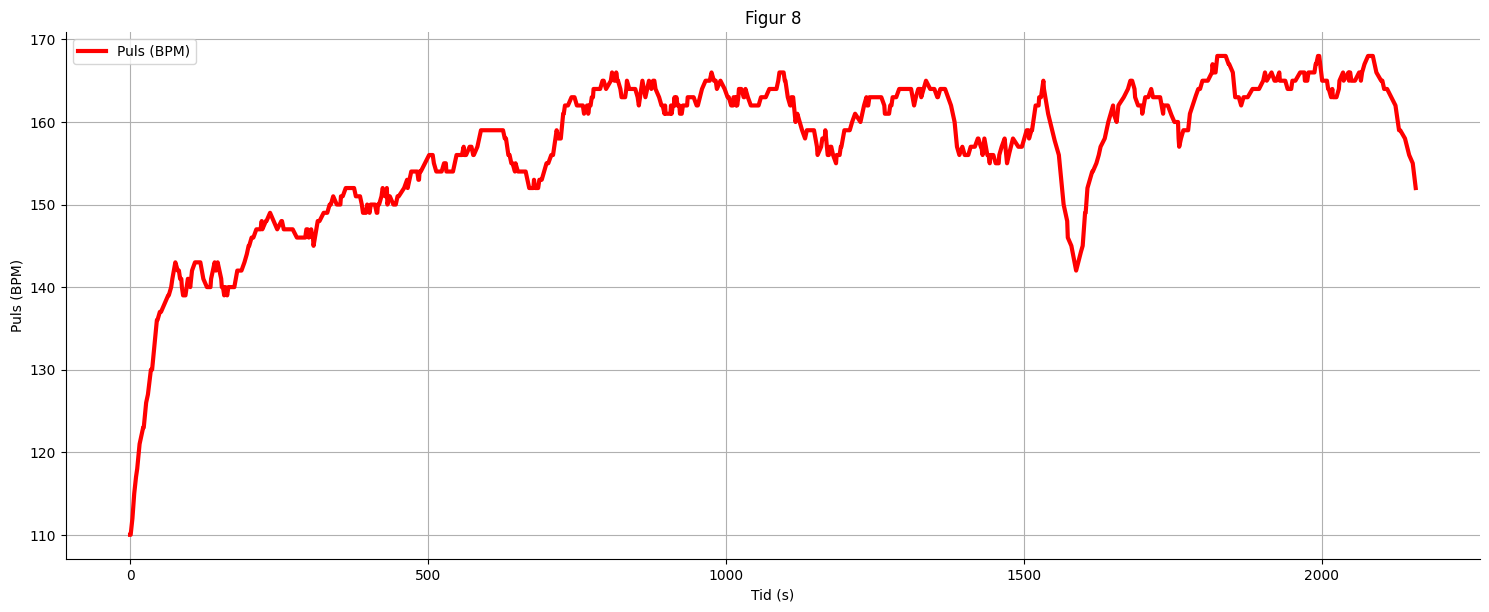

In [29]:
sns.relplot(data=df, x="Time", y="Hr", kind="line", linewidth=3, height=6, aspect=2.5, label="Puls (BPM)", color="red")
plt.legend()
plt.xlabel("Tid (s)")
plt.ylabel("Puls (BPM)")
plt.title("Figur 8")
plt.grid()
plt.show()

Det kan se ut som at en $y = a\cdot ln(x)+b$. Passer bra som en tilnærming, vi kan bruke ChatGPT til å hjelpe med å lage en logaritmisk regresjonsmodell og finne en $R^2$ verdi, programet er redigert av meg:

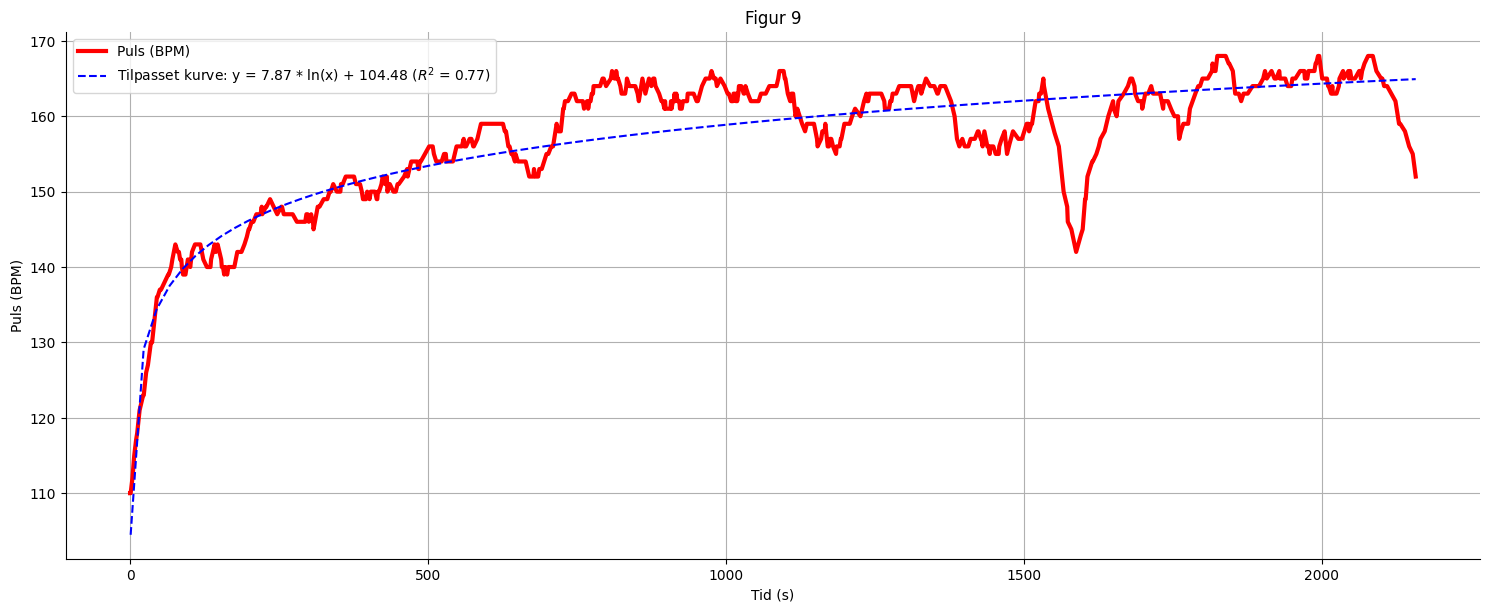

In [30]:
# Define a logarithmic function
def log_func(x, a, b):
    return a * np.log(x) + b

# Fit the curve using curve_fit
x_data = df['Time']
y_data = df['Hr']

# Remove zeros from x_data to avoid log(0)
x_data_no_zeros = x_data[x_data > 0]
y_data_no_zeros = y_data[x_data > 0]

params, covariance = curve_fit(log_func, x_data_no_zeros, y_data_no_zeros)

# Predicted values using the fitted parameters
y_pred = log_func(x_data_no_zeros, *params)

# Calculate R^2
residuals = y_data_no_zeros - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data_no_zeros - np.mean(y_data_no_zeros))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot the original data
sns.relplot(data=df, x="Time", y="Hr", kind="line", linewidth=3, height=6, aspect=2.5, label="Puls (BPM)", color="red")
plt.xlabel('Tid (s)')
plt.ylabel('Puls (BPM)')

# Plot the fitted logarithmic curve
x_fit = np.linspace(min(x_data_no_zeros), max(x_data_no_zeros), 100)
y_fit = log_func(x_fit, *params)
plt.plot(x_fit, y_fit, 'b--', label=f'Tilpasset kurve: y = {params[0]:.2f} * ln(x) + {params[1]:.2f} ($R^2$ = {r_squared:.2f})')
plt.legend()
plt.title('Figur 9')
plt.grid()
plt.show()

For å teste om dette er en god modell, så kan vi se på $R^2$ verdien, her finnes det biblioteker som kan gjøre det, men det funket ikke for meg av en eller annen grund, så da spurte jeg ChatGPT om hvordan jeg kunne regne ut $R^2$ verdien. Da jeg skjekket det den skrev med det "Newcastle University" skriver om hvordan man kan vinne en $R^2$ verdi så stemte det godt overens. Her er $R^2=0.79$, dette betyr at modellen passer ganske bra, spesielt med tanke på at dette er virkelige data og da kan det være støy, uteliggende målinger eller liknende som påvirker datasettet. Vi kan se at pulsen stiger en del i starten, men begyner å flate ut mot slutten av treningsøkten. Dette stemmer ganske bra med hypotesen. Videre så kan vi se nøyere på pulsen med et boxplot og beskrivelse av dataene:

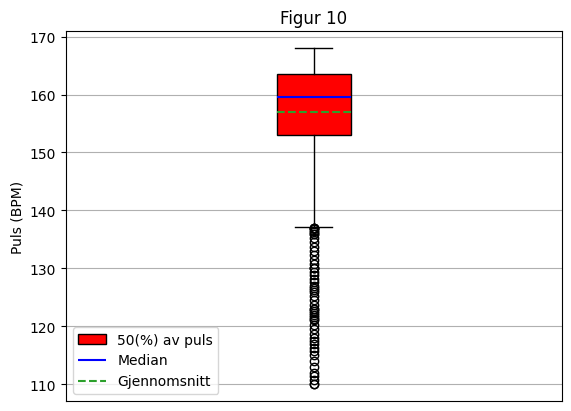

In [31]:
ans=plt.boxplot(df.Hr, showmeans=True, meanline=True, patch_artist=True)
#print(ans["means"][0])
ans["means"][0].set_label("Gjennomsnitt")
ans["means"][0].set_linewidth(1.5)
ans["boxes"][0].set_label("50(%) av puls")
ans["boxes"][0].set_facecolor("red")
ans["medians"][0].set_label("Median")
ans["medians"][0].set_color("blue")
ans["medians"][0].set_linewidth(1.5)
plt.title("Figur 10")
plt.ylabel("Puls (BPM)")
plt.grid()
plt.legend(loc="lower left")
plt.xticks([])
plt.show()

In [32]:
df.Hr.describe()

count    2159.000000
mean      157.046781
std         8.939207
min       110.000000
25%       153.000000
50%       159.500000
75%       163.571429
max       168.000000
Name: Hr, dtype: float64

Figur 10 viser et boxplot av pulsen, her ser vi at 50% av dataene ligger innenfor den røde boksen. Disse dataene ligger altså mellom Q1 (25% kvartilen) og Q3 (75% kvartilen) som i dette tilfellet er mellom 153 og 163 BPM. Dette kan tyde på en ganske gjevn puls. Figuren viser også dataene som ligger innenfor 1.5 ganger av interkvartilbredden, dette vises ved "T" formene (engelsk: whisker). Uteliggerdataene er markert med sirkler. På den øvre "T"-formen så er den ikke 1.5 ganger lengre enn interkvartlibredden, fordi det ikke er noen datapunkter som er så høye. Den stopper altså ved enten 1.5 eller maks verdien, den av dem som kommer først. Beskrivelsen av pulsen sier at gjennomsnittspulsen er ca 157 BPM, og det er et standaravvik på 9.22. Minstepulsen er 110 og makspulsen er 168. Median pulsen er lik Q2 som er 160. Det betyr at 50% av dataene er over og 50% er under punktene. Figur 10 viser også medianpulsen og gjenomsnittet. Uteliggerverdiene i plottet er nok ikke uteliggere, men starten av treningsøkten. Dersom vi ser på Figur 8 så ser vi at alle av verdiene under 138 (nedre whisker) er i starten av treningsøkten, mens pulsen fortsatt økte.

### GPS

For moroskyld så har jeg også plottet GPS sporet under

Her er løypen som ble gått.

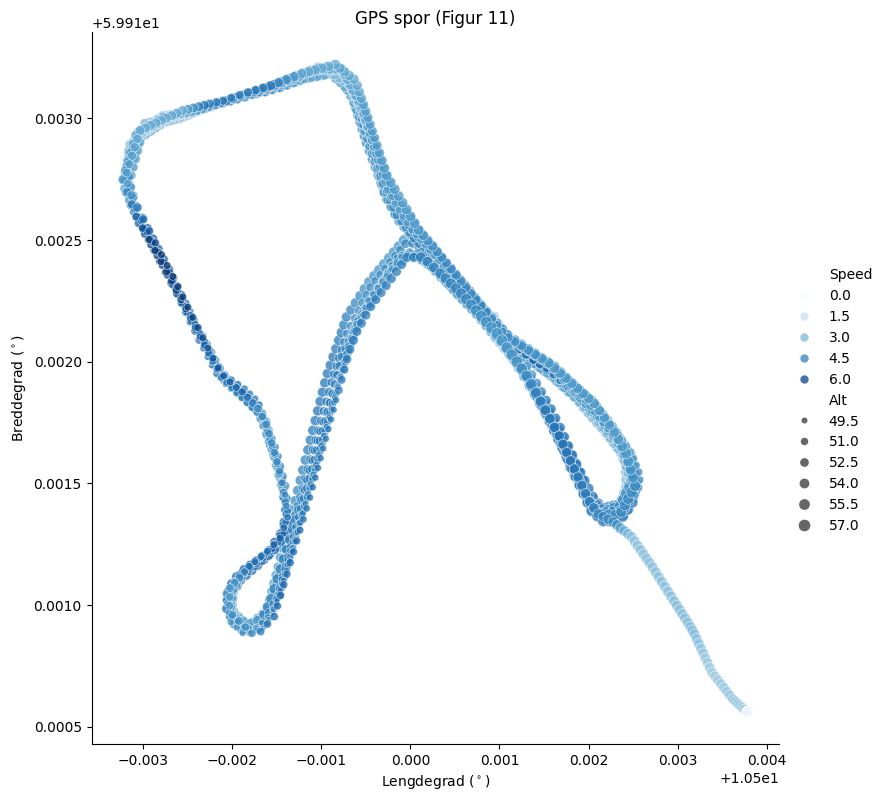

In [33]:
sns.relplot(data=df, x="Long", y="Lat", hue= "Speed", size="Alt", height=8, palette="Blues", label = "GPS spor", alpha=0.75)
plt.title("GPS spor (Figur 11)")
plt.xlabel("Lengdegrad ($^\circ$)")
plt.ylabel("Breddegrad ($^\circ$)")
plt.show()

Her representerer fargen hastigheten, jo mørkere farge jo fortere hastighet og størelsen høydemeter. JEg spurte også ChatGpt om den kunne plotte det i 3D, det kunne den! Figur 11 er et 3D plot og er interaktivt (hvertfall i min jupyter notebook i visual studio code)

In [34]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    df,
    x="Long",
    y="Lat",
    z="Alt",
    color="Speed",
    size="Speed",
    color_continuous_scale="Blues",
    labels={"Long": "Lengdegrad", "Lat": "Breddegrad", "Alt": "Høyde (m)", "Speed": "Hastighet (m/s)"},
    title="GPS spor (Figur 12)"
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title="Lengdegrad",
        yaxis_title="Breddegrad",
        zaxis_title="Høyde (m)"
    ),
    coloraxis_colorbar=dict(title="Speed"),
    height=800,
    width=1000
)

# Show the plot
fig.show()

Figur 12 sett fra toppen viser løypen slik som Figur 11, men det som er interesant er om du spinner figuren, sånn at du ser den fra siden så kan vi se at det er ganske mye kaos. Dette er overaskende, fordi alle punktene på for en gitt lengdegrad og breddegrad burde ha samme høyde, men det har de ikke. Dette kan tyde på at høydemåleren er litt dårlig. Noe som kan være en feilkilde ved sammenlikningen av puls og høyde.

### Drøfting

Oppsumering av det jeg har skrevet så langt

### Konlusjon

I dataene er det god sammenheng mellom $V(t)$ og $S'(t)$. Sammenhengen blir enda tydeligere dersom du forskyver $S'(t)$ med fire sekunder. Jeg tror dette skyldes et filter som har som gjevner ut målingene. Gjennomsnittene til $V(t)$ og $S'(t)$ er derimot statistisk signifikant forskjellige. Det er trolig ingen korrelasjon mellom puls og høydeendring. Dette kan være grunnet en dårlig høydemåler. Pulsen stiger en del i starten men stabiliserer seg mot slutten og en logaritmisk tillpassning passer godt.

### Ekstra (SKAL FJERNES!!):

In [35]:
assert 1==2

AssertionError: 

In [ ]:
Speed_Speed_from_dist=df[["Speed","Speed_from_dist"]]
#korrelasjon_Speed_Speed_from_dist=Speed_Speed_from_dist.corr()
print("r=",Speed_Speed_from_dist.corr())

In [ ]:
(df.Time.shift(-1)-df.Time).argmin()

In [ ]:
df.loc[140:150,:]

In [22]:
print(np.mean(df["Speed"].dropna()))
print(np.mean(df.Speed_from_dist.shift(4).dropna()))
s1 = np.std(df["Speed"].dropna())/len(df)**0.5
print(s1)
s2 = np.std(df.Speed_from_dist.shift(4).dropna())/len(df)**0.5
print(s2)
print((s1**2+s2**2)**0.5)


4.087173454453129
4.1509623332366585
0.019349029572133518
0.020487413822891955
0.028180118355566247
